<a href="https://colab.research.google.com/github/Latetera/Challenge-TelecomX/blob/main/Challenge_TelecomX_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Extracción**

In [1]:
#importa pandas
import pandas as pd

#carga los datos desde la API e inspecciona el dataframe
df = pd.read_json('TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###**Normalización de datos**

In [2]:
#enlista las columnas que contienen datos anidados
columnas_anidadas = df.columns[2:]
columnas_anidadas

Index(['customer', 'phone', 'internet', 'account'], dtype='object')

In [3]:
#extrae los datos de todas las columnas anidadas
for columna in columnas_anidadas:
    df_desglosado = pd.json_normalize(df[columna])
    df = pd.concat([df.drop(columna, axis=1), df_desglosado], axis=1)

In [4]:
#verifica el dataframe desglosado
pd.set_option('display.max_columns', None)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#**2. Transformación**

In [5]:
#inspecciona el dataframe y sus tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
#verifica si hay valores duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
#verifica si existen valores inconsistentes
columnas_desglosadas = df.columns
for columna in columnas_desglosadas:
    print(f'{columna}:{pd.unique(df[columna])}')

customerID:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn:['No' 'Yes' '']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['Yes' 'No']
tenure:[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService:['Yes' 'No']
MultipleLines:['No' 'Yes' 'No phone service']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['Yes' 'No' 'No internet service']
StreamingTV:['Yes' 'No' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['One year' 'Month-to-month' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Mailed check' 'Electronic check' 'Credit card (automati

In [8]:
#revisa los registros inconsistentes de la columna 'Churn' para evaluar el mejor tratamiento
df[df['Churn']=='']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [9]:
#quita los registros con espacio en blanco de la columna 'Churn'
#al no saber si hubo o no evasión del cliente
df.drop(df[df['Churn']==''].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
#df.info()

In [10]:
#revisa los registros inconsistentes de la columna 'tenure' para evaluar el mejor tratamiento
df[df['tenure']==0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [11]:
#quita los registros con valor igual a 0 de la columna 'tenure'
#al no conocer el cargo total para calcularle
df.drop(df[df['tenure']==0].index, inplace=True)
df.reset_index(drop=True, inplace=True)
#df.info()

In [12]:
#cambia el tipo de datos de la columna 'Charges.Total'

#importa numpy
import numpy as np

df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
#df.info()

In [13]:
#redondea a dos decimales las columnas 'Charges.Monthly' y 'Charges.Total'

df['Charges.Monthly'] = df['Charges.Monthly'].apply(lambda x: round(x,2))
df['Charges.Total'] = df['Charges.Total'].apply(lambda x: round(x,2))
#df

In [14]:
#verifica los cambios aplicados
columnas_desglosadas = df.columns
for columna in columnas_desglosadas:
    print(f'{columna}:{pd.unique(df[columna])}')

customerID:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn:['No' 'Yes']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['Yes' 'No']
tenure:[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
PhoneService:['Yes' 'No']
MultipleLines:['No' 'Yes' 'No phone service']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['Yes' 'No' 'No internet service']
StreamingTV:['Yes' 'No' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['One year' 'Month-to-month' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'B

In [15]:
#crea la columna 'Cuentas_Diarias'
df['Cuentas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [16]:
#crea la columna binaria 'Internet'
df['Internet'] = df['InternetService'].copy().apply(lambda x: x.replace(x, 'No') if x=='No' else x.replace(x, 'Yes'))
#df.info()

In [17]:
#reorganiza las columnas nuevas
df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 22, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 19, 20]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   Internet          7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


In [18]:
#traduce y estandariza los nombres de las columnas
df.rename(columns=
         {'customerID':'Cliente_ID',
          'Churn':'Evasión',
          'gender':'Género',
          'SeniorCitizen':'3a_Edad',
          'Partner':'Pareja',
          'Dependents':'Dependientes',
          'tenure':'Meses',
          'PhoneService':'Telefonía',
          'MultipleLines':'Multilínea',
          'InternetService':'Conexión',
          'OnlineSecurity':'Seguridad_online',
          'OnlineBackup':'Respaldo_online',
          'DeviceProtection':'Protección_Dispositivo',
          'TechSupport':'Asistencia_Técnica',
          'StreamingTV':'TV_Cable',
          'StreamingMovies':'Streaming_películas',
          'Contract':'Tipo_Contrato',
          'PaperlessBilling':'Factura_Electrónica',
          'PaymentMethod':'Forma_Pago',
          'Cuentas_Diarias':'Cargo_Diario',
          'Charges.Monthly':'Cargo_Mensual',
          'Charges.Total':'Cargo_Total'},
          inplace=True
         )
df.sample(5)

,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
4642,6563-VRERX,No,Male,0,Yes,Yes,33,Yes,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.69,20.60,690.25
3826,5386-THSLQ,No,Female,1,Yes,No,66,No,No phone service,Yes,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),1.52,45.55,3027.25
1928,2806-MLNTI,No,Male,1,Yes,No,52,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),3.50,105.10,5376.40
3554,5049-MUBWG,No,Male,0,No,No,26,Yes,No,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),2.50,75.00,1908.35
1941,2821-WARNZ,No,Female,0,No,Yes,49,Yes,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.65,19.45,921.30


In [19]:
#convierte columnas textuales a binarias

#true
df.replace('Yes', 1, inplace=True)

#false
valores_false = ['No', 'No phone service', 'No internet service']
for elemento in valores_false:
    df.replace(elemento, 0, inplace=True)

df.sample(5)

<ipython-input-19-1a4f45c74b82>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(elemento, 0, inplace=True)


,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
3921,5533-RJFTJ,0,Male,0,0,0,49,0,0,1,DSL,0,0,1,0,0,0,Month-to-month,1,Bank transfer (automatic),1.01,30.20,1453.10
4158,5893-PYOLZ,0,Male,0,0,0,56,1,0,1,DSL,0,1,1,1,1,1,Two year,1,Credit card (automatic),2.73,81.80,4534.45
5135,7242-EDTYC,0,Male,0,0,1,44,1,0,0,0,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),0.65,19.55,819.95
2797,3987-KQDDU,0,Male,0,0,0,9,1,0,1,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Electronic check,2.52,75.60,661.55
5218,7359-PTSXY,1,Male,0,0,0,1,1,0,1,DSL,0,0,0,0,0,0,Month-to-month,0,Electronic check,1.52,45.75,45.75


In [20]:
#reemplaza el valor 0 de la columna categórica 'Conexión'
df.replace({'Conexión': 0}, 'No tiene internet', inplace=True)

In [21]:
#traduce los valores de la columna 'Género'
df['Género'] = df['Género'].apply(lambda x: x.replace(x, 'Mujer') if x=='Female' else x.replace(x, 'Hombre'))

In [22]:
#traduce los valores de la columna 'Conexión'
df.replace({'Conexión': 'Fiber optic'}, 'Fibra óptica', inplace=True)

In [23]:
#traduce los valores de la columna 'Tipo_Contrato'
df['Tipo_Contrato'] = df['Tipo_Contrato'].apply(lambda x: x.replace(x, 'Mensual') if x=='Month-to-month' else x.replace(x,'Anual') if x=='One year' else x.replace(x, 'Bianual'))

In [24]:
#traduce los valores de la columna 'Forma_Pago'
df['Forma_Pago'] = df['Forma_Pago'].apply(lambda x: x.replace(x, 'Cheque postal') if x=='Mailed check' else x.replace(x,'Cheque electrónico') if x=='Electronic check' else x.replace(x, 'Tarjeta de Crédito (automático)') if x=='Credit card (automatic)' else x.replace(x, 'Transferencia (automático)'))

In [25]:
#verifica los cambios
df.sample(5)

,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
1244,1843-TLSGD,0,Mujer,0,1,1,13,1,0,0,No tiene internet,0,0,0,0,0,0,Bianual,0,Cheque postal,0.70,20.85,272.35
1189,1754-GKYPY,0,Hombre,1,1,0,22,1,0,1,Fibra óptica,0,0,0,0,1,1,Mensual,1,Transferencia (automático),2.99,89.75,1938.90
3900,5499-ECUTN,0,Mujer,0,1,0,47,1,0,1,DSL,1,0,1,0,1,0,Anual,1,Tarjeta de Crédito (automático),2.20,66.05,3021.45
5112,7206-PQBBZ,0,Hombre,1,1,0,11,1,0,1,Fibra óptica,0,0,0,0,0,0,Mensual,1,Cheque electrónico,2.34,70.20,834.70
4041,5702-SKUOB,0,Mujer,0,1,0,4,1,0,0,No tiene internet,0,0,0,0,0,0,Mensual,0,Cheque postal,0.65,19.60,93.45


In [26]:
#verifica el tipo de datos de las columnas modificadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_ID              7032 non-null   object 
 1   Evasión                 7032 non-null   int64  
 2   Género                  7032 non-null   object 
 3   3a_Edad                 7032 non-null   int64  
 4   Pareja                  7032 non-null   int64  
 5   Dependientes            7032 non-null   int64  
 6   Meses                   7032 non-null   int64  
 7   Telefonía               7032 non-null   int64  
 8   Multilínea              7032 non-null   int64  
 9   Internet                7032 non-null   int64  
 10  Conexión                7032 non-null   object 
 11  Seguridad_online        7032 non-null   int64  
 12  Respaldo_online         7032 non-null   int64  
 13  Protección_Dispositivo  7032 non-null   int64  
 14  Asistencia_Técnica      7032 non-null   

In [27]:
#df.to_json('TelecomX_normalizado.json')

#**3. Carga y análisis**

###**Análisis descriptivo**

In [28]:
#general
df.describe(include='all')

,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
count,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000
unique,7032,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fibra óptica,NaN,NaN,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265785,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,NaN,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,NaN,0.592719,NaN,2.159891,64.798208,2283.300441
std,NaN,0.441782,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,NaN,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,NaN,0.491363,NaN,1.002955,30.085974,2266.771362
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.610000,18.250000,18.800000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.187500,35.587500,401.450000
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,2.340000,70.350000,1397.475000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,2.992500,89.862500,3794.737500


In [29]:
#evasión
df.query('Evasión==1').describe(include='all')

,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
count,1869,1869.0,1869,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869,1869.000000,1869,1869.000000,1869.000000,1869.000000
unique,1869,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9992-RRAMN,NaN,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fibra óptica,NaN,NaN,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297,NaN,NaN,NaN,NaN,NaN,NaN,1655,NaN,1071,NaN,NaN,NaN
mean,NaN,1.0,NaN,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.939540,NaN,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,NaN,0.749064,NaN,2.481450,74.441332,1531.796094
std,NaN,0.0,NaN,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.238401,NaN,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,NaN,0.433668,NaN,0.822287,24.666053,1890.822994
min,NaN,1.0,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.630000,18.850000,18.850000
25%,NaN,1.0,NaN,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.870000,56.150000,134.500000
50%,NaN,1.0,NaN,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,2.660000,79.650000,703.550000
75%,NaN,1.0,NaN,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,NaN,3.140000,94.200000,2331.300000


In [30]:
#permanencia
df.query('Evasión==0').describe(include='all')

,Cliente_ID,Evasión,Género,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Conexión,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Tipo_Contrato,Factura_Electrónica,Forma_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
count,5163,5163.0,5163,5163.000000,5163.000000,5163.000000,5163.00000,5163.000000,5163.000000,5163.000000,5163,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163,5163.000000,5163,5163.000000,5163.000000,5163.000000
unique,5163,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSL,NaN,NaN,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque postal,NaN,NaN,NaN
freq,1,NaN,2619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957,NaN,NaN,NaN,NaN,NaN,NaN,2220,NaN,1296,NaN,NaN,NaN
mean,NaN,0.0,NaN,0.128995,0.527600,0.343405,37.65001,0.901220,0.410033,0.727484,NaN,0.333140,0.368390,0.362774,0.335077,0.365873,0.370521,NaN,0.536122,NaN,2.043486,61.307408,2555.344141
std,NaN,0.0,NaN,0.335227,0.499286,0.474891,24.07694,0.298395,0.491887,0.445297,NaN,0.471382,0.482415,0.480847,0.472063,0.481721,0.482991,NaN,0.498742,NaN,1.036560,31.094557,2329.456984
min,NaN,0.0,NaN,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.610000,18.250000,18.800000
25%,NaN,0.0,NaN,0.000000,0.000000,0.000000,15.00000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.840000,25.100000,577.825000
50%,NaN,0.0,NaN,0.000000,1.000000,0.000000,38.00000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,2.150000,64.450000,1683.600000
75%,NaN,0.0,NaN,0.000000,1.000000,1.000000,61.00000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,2.950000,88.475000,4264.125000


##**EDA**

###**Distribución de evasión**

In [31]:
#importa el módulo pyplot
import matplotlib.pyplot as plt

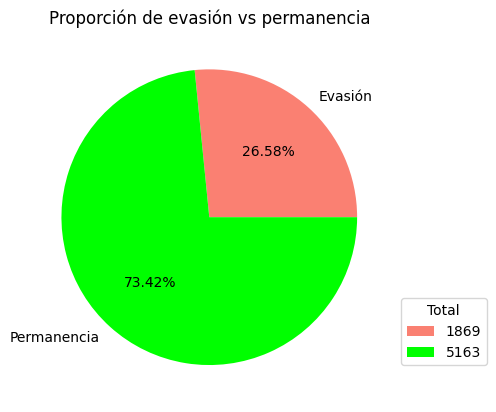

In [32]:
#evasión total vs. permanencia
evasion_total = df['Evasión'].sum()
permanencia = df['Evasión'].count() - df['Evasión'].sum()

etiquetas = 'Evasión', 'Permanencia'
evasion = [evasion_total, permanencia]

fig, ax = plt.subplots()
ax.pie(evasion, labels=etiquetas, autopct='%1.2f%%', colors=['salmon', 'lime'])
ax.set_title('Proporción de evasión vs permanencia')
ax.legend((evasion_total, permanencia), title='Total', bbox_to_anchor=(1, 0, 0, 0.3))

plt.savefig('proporcion_evasion.png')

plt.show()

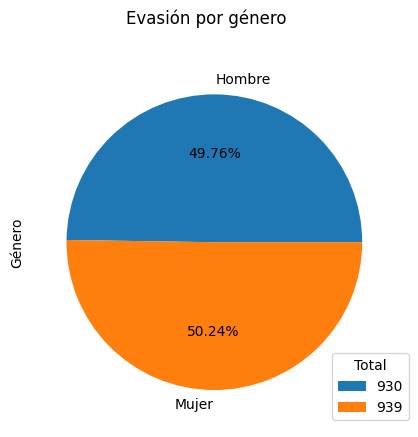

In [33]:
#proporción por género de la evasión total
evasion_por_genero = df.query('Evasión==1').groupby('Género')[['Género']].count()

evasion_por_genero.plot(kind='pie', subplots=True, autopct='%1.2f%%', title='Evasión por género')
plt.legend(('930', '939'), title='Total', bbox_to_anchor=(0.8, 0, 0, 0.3))
plt.savefig('evasion_genero.png')
plt.show()

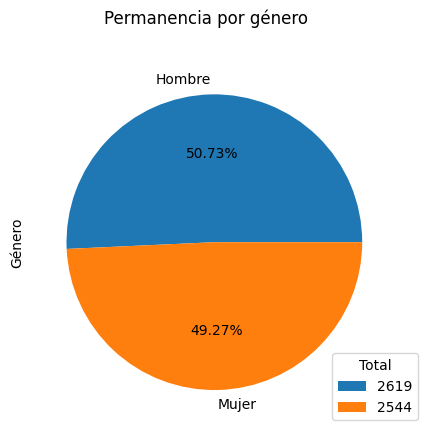

In [34]:
#proporción por género de la permanencia
permanencia_por_genero = df.query('Evasión==0').groupby('Género')[['Género']].count()
permanencia_por_genero.plot(kind='pie', subplots=True, autopct='%1.2f%%', title='Permanencia por género')
plt.legend(('2619', '2544'), title='Total', bbox_to_anchor=(0.8, 0, 0, 0.3))
plt.savefig('permanencia_genero.png')
plt.show()

###**Recuento de evasión por variables categóricas**

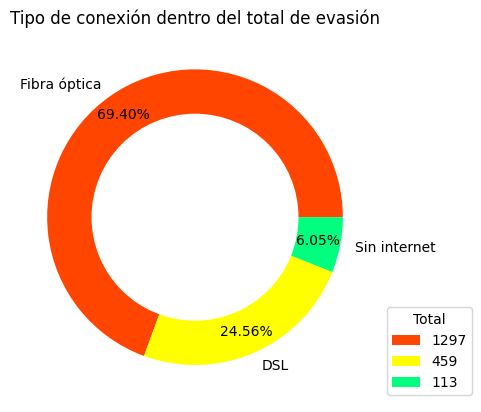

In [35]:
#proporción del tipo de conexión en la evasión total

evasion_fibra = df.query('Evasión==1 & Conexión=="Fibra óptica"')['Conexión'].count()
evasion_dsl = df.query('Evasión==1 & Conexión=="DSL"')['Conexión'].count()
evasion_sin_internet = df.query('Evasión==1 & Conexión=="No tiene internet"')['Conexión'].count()

etiquetas_conexion = 'Fibra óptica', 'DSL', 'Sin internet'
evasion_conexion = [evasion_fibra, evasion_dsl, evasion_sin_internet]

fig, ax = plt.subplots()
ax.pie(evasion_conexion, labels=etiquetas_conexion, autopct='%1.2f%%', pctdistance=0.85, colors=['orangered', 'yellow', 'springgreen'])
ax.set_title('Tipo de conexión dentro del total de evasión')
circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)
ax.legend((evasion_fibra, evasion_dsl, evasion_sin_internet), title='Total', bbox_to_anchor=(1, 0, 0, 0.5))
plt.savefig('conexion_evasion.png')
plt.show()

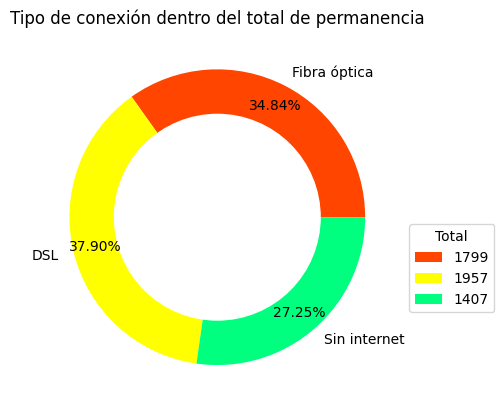

In [36]:
#proporción del tipo de conexión en permanencia

permanencia_fibra = df.query('Evasión==0 & Conexión=="Fibra óptica"')['Conexión'].count()
permanencia_dsl = df.query('Evasión==0 & Conexión=="DSL"')['Conexión'].count()
permanencia_sin_internet = df.query('Evasión==0 & Conexión=="No tiene internet"')['Conexión'].count()

permanencia_conexion = [permanencia_fibra, permanencia_dsl, permanencia_sin_internet]

fig, ax = plt.subplots()
ax.pie(permanencia_conexion, labels=etiquetas_conexion, autopct='%1.2f%%', pctdistance=0.85, colors=['orangered', 'yellow', 'springgreen'])
ax.set_title('Tipo de conexión dentro del total de permanencia')
circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)
ax.legend((permanencia_fibra, permanencia_dsl, permanencia_sin_internet), title='Total', bbox_to_anchor=(1, 0, 0, 0.5))
plt.savefig('conexion_permanencia.png')
plt.show()

In [37]:
columnas_categoricas = ['Cliente_ID', 'Género', 'Conexión', 'Tipo_Contrato', 'Forma_Pago']

In [38]:
categoricas_evasion = df.query('Evasión==1')[columnas_categoricas]
#categoricas_evasion

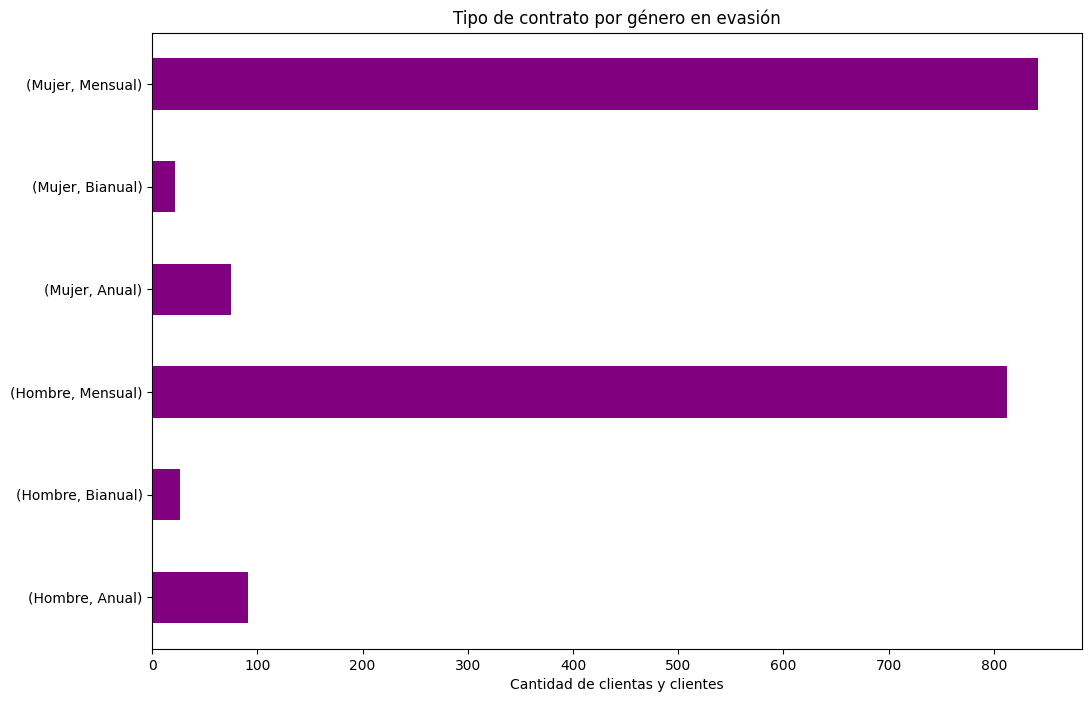

In [39]:
#tipo de contrato en evasión
tipo_contrato_evasion = categoricas_evasion.groupby(['Género', 'Tipo_Contrato'])[['Tipo_Contrato']].count().sort_values('Género')
tipo_contrato_evasion.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title='Tipo de contrato por género en evasión', legend='')
plt.savefig('contrato_evasion.png')
plt.show()

In [40]:
categoricas_permanencia = df.query('Evasión==0')[columnas_categoricas]
#categoricas_permanencia

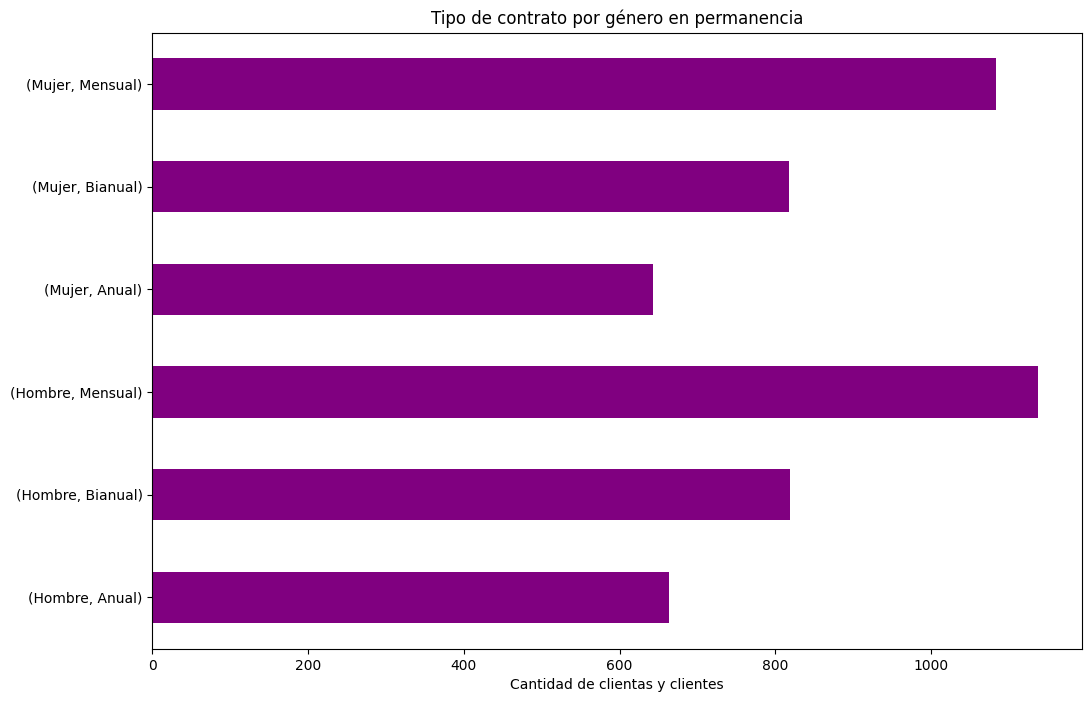

In [41]:
#tipo de contrato en permanencia
tipo_contrato_permanencia = categoricas_permanencia.groupby(['Género', 'Tipo_Contrato'])[['Tipo_Contrato']].count().sort_values('Género')
tipo_contrato_permanencia.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title='Tipo de contrato por género en permanencia', legend='')
plt.savefig('contrato_permanencia.png')
plt.show()

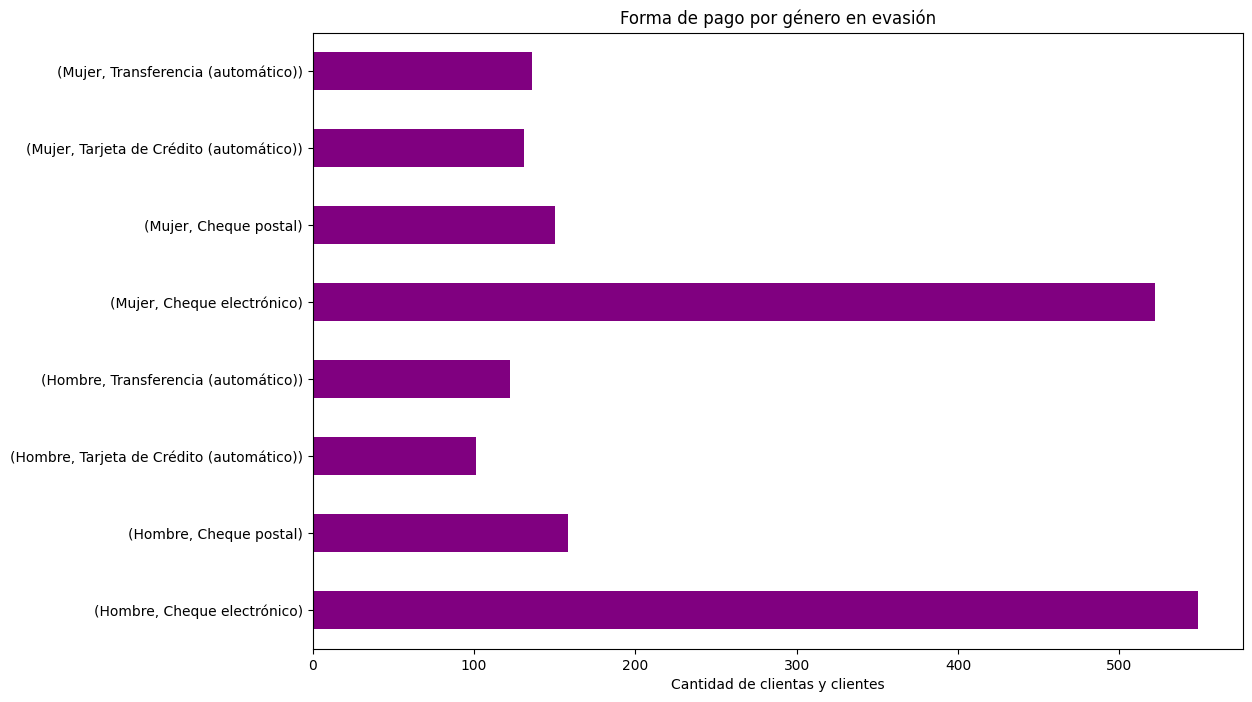

In [42]:
#forma de pago en evasión
forma_pago_evasion = categoricas_evasion.groupby(['Género', 'Forma_Pago'])[['Forma_Pago']].count().sort_values('Género')
forma_pago_evasion.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title = 'Forma de pago por género en evasión', legend='')
plt.savefig('pago_evasion.png')
plt.show()

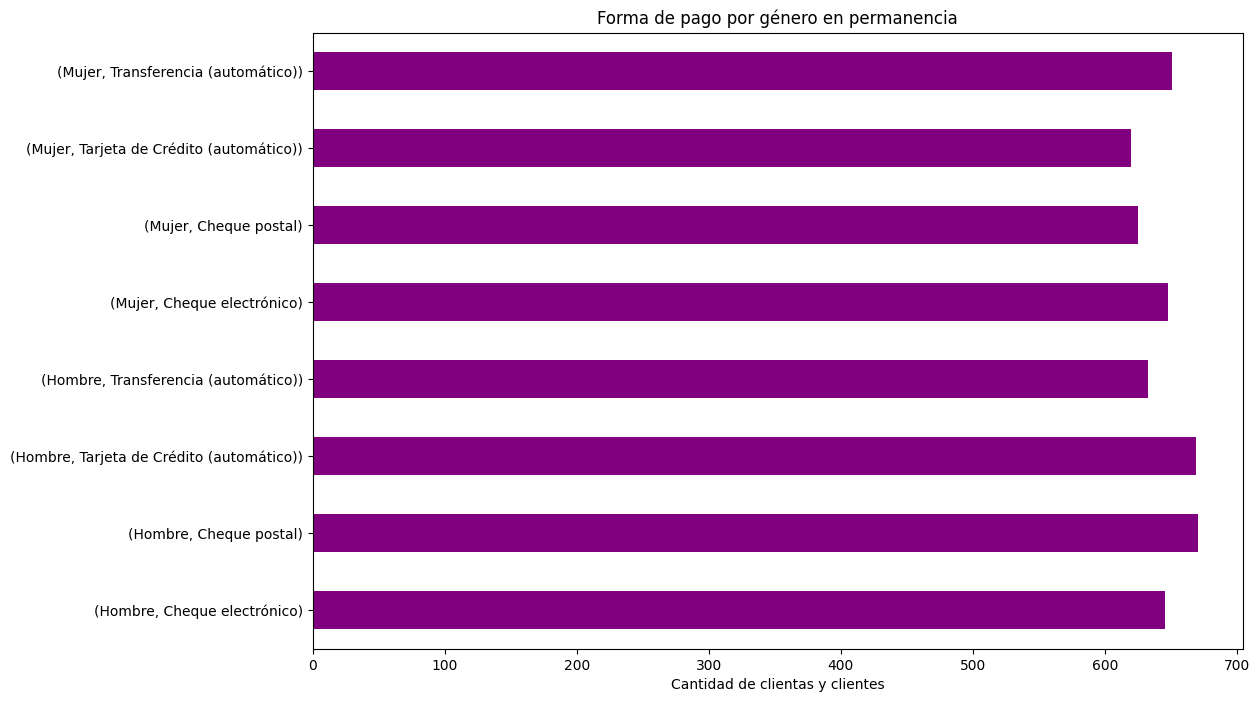

In [43]:
#forma pago permanencia
forma_pago_permanencia = categoricas_permanencia.groupby(['Género', 'Forma_Pago'])[['Forma_Pago']].count().sort_values('Género')
forma_pago_permanencia.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title='Forma de pago por género en permanencia', legend='')
plt.savefig('pago_permanencia.png')
plt.show()

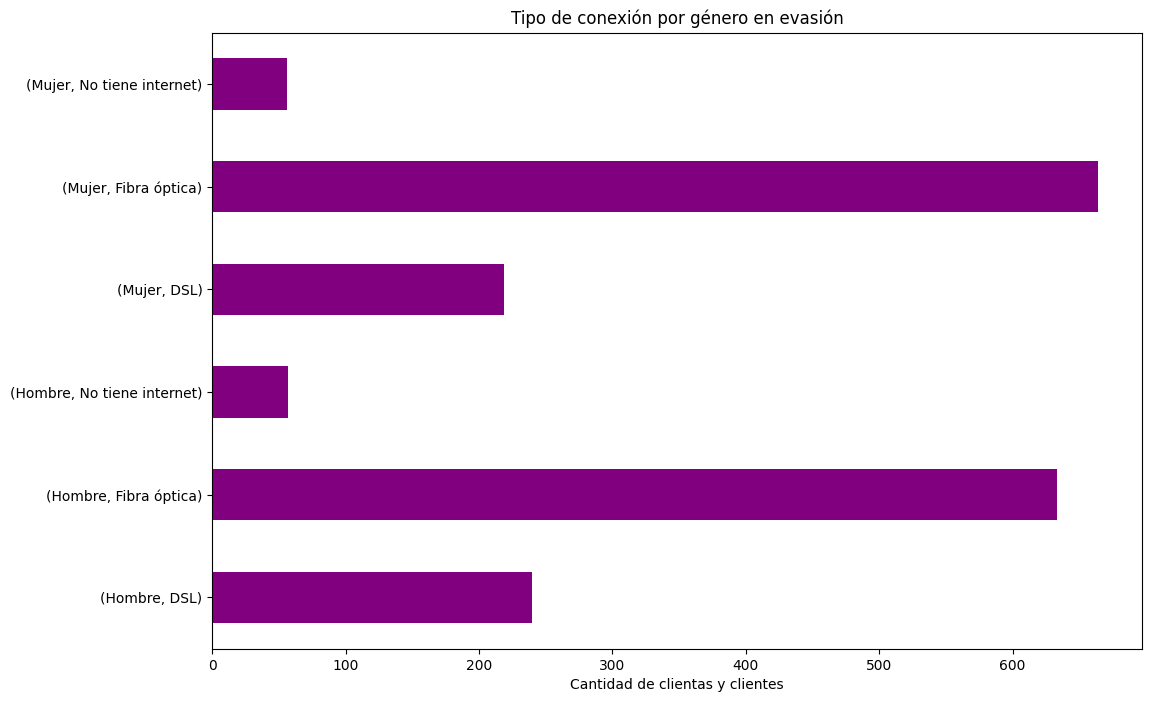

In [44]:
#conexión por género en evasión
conexion_evasion = categoricas_evasion.groupby(['Género', 'Conexión'])[['Conexión']].count().sort_values('Género')
conexion_evasion.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title='Tipo de conexión por género en evasión', legend='')
plt.savefig('conexion_genero_evasion.png')
plt.show()

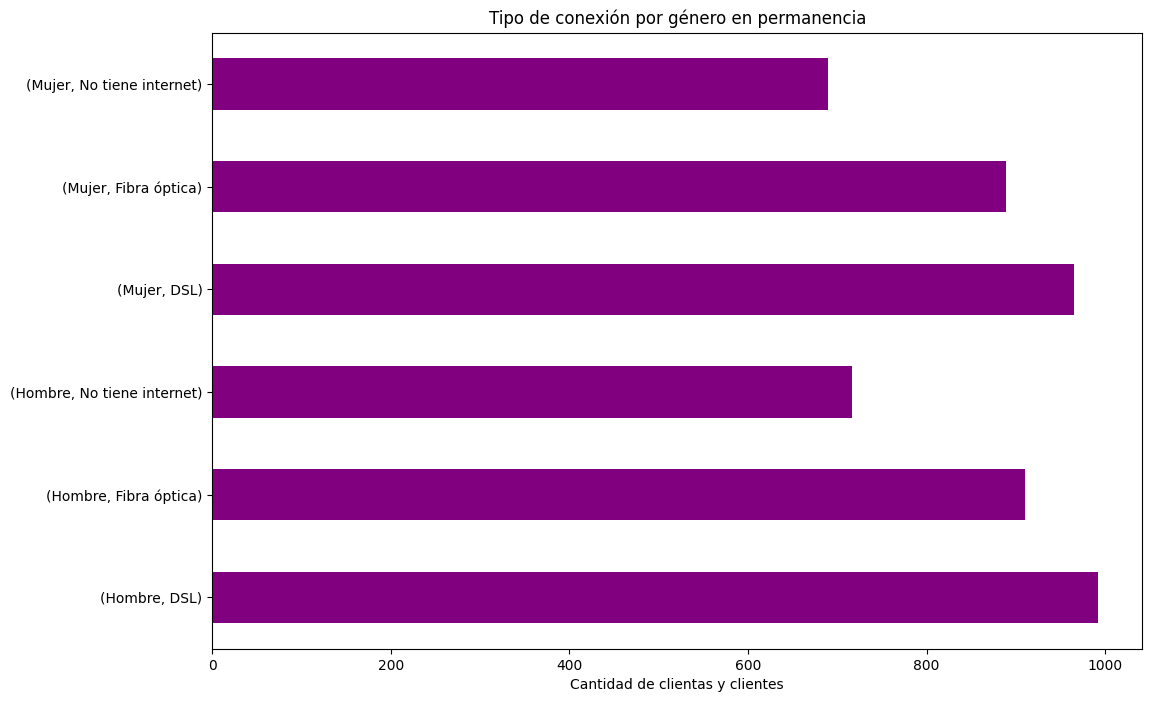

In [45]:
#conexión por género en permanencia
conexion_permanencia = categoricas_permanencia.groupby(['Género', 'Conexión'])[['Conexión']].count().sort_values('Género')
conexion_permanencia.plot(kind='barh', figsize=(12,8), xlabel='Cantidad de clientas y clientes', ylabel='', color='purple', title='Tipo de conexión por género en permanencia', legend='')
plt.savefig('conexion_genero_permanencia.png')
plt.show()

###**Conteo de evasión por variables numéricas**

In [46]:
columnas_numericas = df.drop(columnas_categoricas, axis=1)
columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evasión                 7032 non-null   int64  
 1   3a_Edad                 7032 non-null   int64  
 2   Pareja                  7032 non-null   int64  
 3   Dependientes            7032 non-null   int64  
 4   Meses                   7032 non-null   int64  
 5   Telefonía               7032 non-null   int64  
 6   Multilínea              7032 non-null   int64  
 7   Internet                7032 non-null   int64  
 8   Seguridad_online        7032 non-null   int64  
 9   Respaldo_online         7032 non-null   int64  
 10  Protección_Dispositivo  7032 non-null   int64  
 11  Asistencia_Técnica      7032 non-null   int64  
 12  TV_Cable                7032 non-null   int64  
 13  Streaming_películas     7032 non-null   int64  
 14  Factura_Electrónica     7032 non-null   

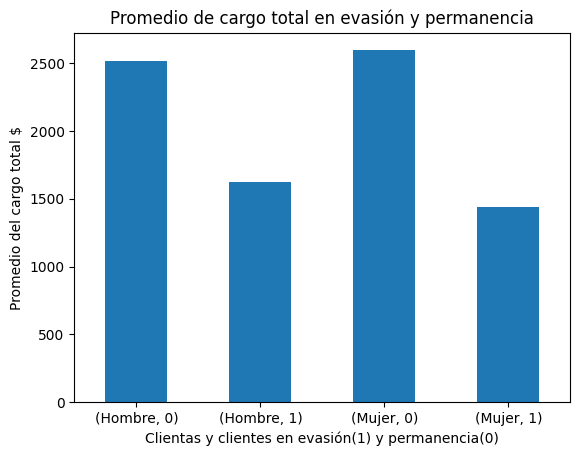

In [47]:
#cargo total en evasión vs. permanencia

analisis_cargo_total = df.groupby(['Género', 'Evasión'])[['Cargo_Total']].mean()

analisis_cargo_total.plot(kind='bar', xlabel='Clientas y clientes en evasión(1) y permanencia(0)', ylabel = 'Promedio del cargo total $', legend='', title='Promedio de cargo total en evasión y permanencia')
plt.xticks(rotation=0)

plt.savefig('cargo_total.png')
plt.show()

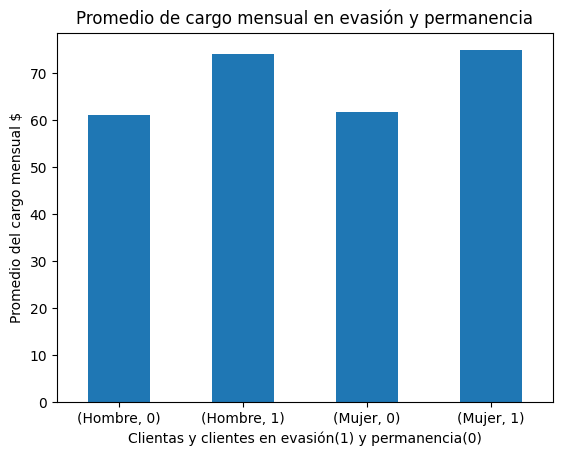

In [48]:
#cargo mensual en evasión vs. permanencia

analisis_cargo_mensual = df.groupby(['Género', 'Evasión'])[['Cargo_Mensual']].mean()

analisis_cargo_mensual.plot(kind='bar', xlabel='Clientas y clientes en evasión(1) y permanencia(0)', ylabel = 'Promedio del cargo mensual $', legend='', title='Promedio de cargo mensual en evasión y permanencia')
plt.xticks(rotation=0)

plt.savefig('cargo_mensual.png')
plt.show()

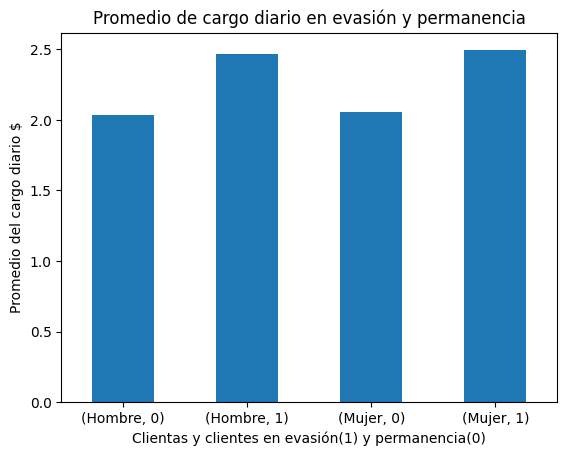

In [49]:
#cargo diario en evasión vs. permanencia

analisis_cargo_diario = df.groupby(['Género', 'Evasión'])[['Cargo_Diario']].mean()

analisis_cargo_diario.plot(kind='bar', xlabel='Clientas y clientes en evasión(1) y permanencia(0)', ylabel = 'Promedio del cargo diario $', legend='', title='Promedio de cargo diario en evasión y permanencia')
plt.xticks(rotation=0)

plt.savefig('cargo_diario.png')
plt.show()

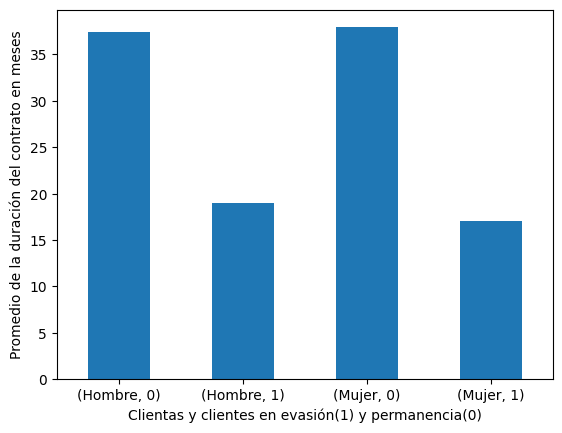

In [50]:
#duracion del contrato en evasión vs. permanencia

analisis_tiempo_contrato = df.groupby(['Género', 'Evasión'])[['Meses']].mean()

analisis_tiempo_contrato.plot(kind='bar', xlabel='Clientas y clientes en evasión(1) y permanencia(0)', ylabel='Promedio de la duración del contrato en meses', legend='')
plt.xticks(rotation=0)

plt.savefig('duracion_contrato.png')
plt.show()

#**Extra**

In [51]:
#crea la columna numérica 'Servicios_Totales'
df['Servicios_Totales'] = columnas_numericas.iloc[:, 5:14].sum(axis=1)

#Explora la correlación entre variables
df_corr = df.corr(numeric_only=True)
df_corr

,Evasión,3a_Edad,Pareja,Dependientes,Meses,Telefonía,Multilínea,Internet,Seguridad_online,Respaldo_online,Protección_Dispositivo,Asistencia_Técnica,TV_Cable,Streaming_películas,Factura_Electrónica,Cargo_Diario,Cargo_Mensual,Cargo_Total,Servicios_Totales
Evasión,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,0.227578,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,0.191454,0.192914,0.192858,-0.199484,-0.019644
3a_Edad,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.182519,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219848,0.219874,0.102411,0.118053
Pareja,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000286,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097884,0.097825,0.319072,0.196272
Dependientes,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.138383,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112395,-0.112343,0.064653,-0.005637
Meses,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.037529,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246874,0.246862,0.825880,0.474370
Telefonía,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.171817,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.247995,0.248033,0.113008,0.083675
Multilínea,0.040033,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.210794,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.163746,0.490936,0.490912,0.469042,0.517739
Internet,0.227578,0.182519,0.000286,-0.138383,0.037529,-0.171817,0.210794,1.000000,0.332799,0.380990,0.380151,0.335695,0.414951,0.418450,0.320592,0.763199,0.763191,0.374878,0.663985
Seguridad_online,-0.171270,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.332799,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296443,0.296447,0.412619,0.524854
Respaldo_online,-0.082307,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.380990,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441511,0.441529,0.510100,0.602351


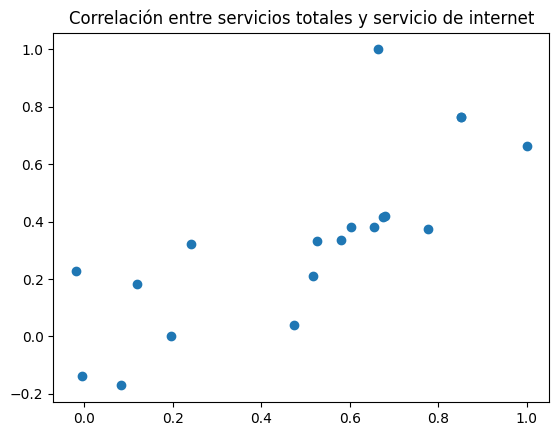

In [52]:
#correlación entre servicios totales y servicio de internet
fig, ax = plt.subplots()
ax.scatter(x=df_corr.Servicios_Totales, y=df_corr.Internet)
ax.set_title('Correlación entre servicios totales y servicio de internet')
plt.savefig('servicios_totales.png')
plt.show()

#**Informe final**

##**Introducción**

Telecom X, empresa de telecomunicaciones, está enfrentando un alto índice de evasión de
clientes. A partir de los datos proporcionados por la empresa, se realiza un análisis predictivo para determinar las causas y realizar las mejores recomendaciones basadas en datos.

##**Limpieza y tratamiento de datos**

Se cargó la información desde la API proporcionada, se desempaquetaron sus datos y se formató como tabla de filas y columnas (Pandas dataframe), con un total homogéneo de 21 columnas, cada una con 7267 filas (registros), con datos de texto, números enteros y decimales.

No se encontraron valores nulos ni duplicados; se encontraron 224 datos inconsistentes (espacios en blanco) en la columna'Churn' la cual indica si hubo o no evasión. Se optó por descartar dichos registros al no contar con indicios para deducir con certeza el dato exacto y al representar sólo el 3% de la información proporcionada. Asimismo, se encontraron 11 datos inconsistentes en la columna 'tenure' (valor de 0 meses en dicha columna y de espacio en blanco en la columna 'Charges.Total') que hace referencia a la duración del contrato, los cuales también se descartaron al no haber información suficiente para inferirlos y representar sólo poco más de una milésima de la información total.

Se reformataron y reorganizaron las columnas categóricas como textuales y las numéricas como enteras y decimales; se añadieron las columnas numéricas 'Cuentas_Diarias', 'Internet' y 'Servicios_Totales'. Se estandarizó y se tradujo el contenido de la tabla para facilitar el análisis.

##**Análisis exploratorio de datos EDA**

duracioEn el análisis exploratorio se observa que la proporción de evasión corresponde a un considerable 26.58% del total.

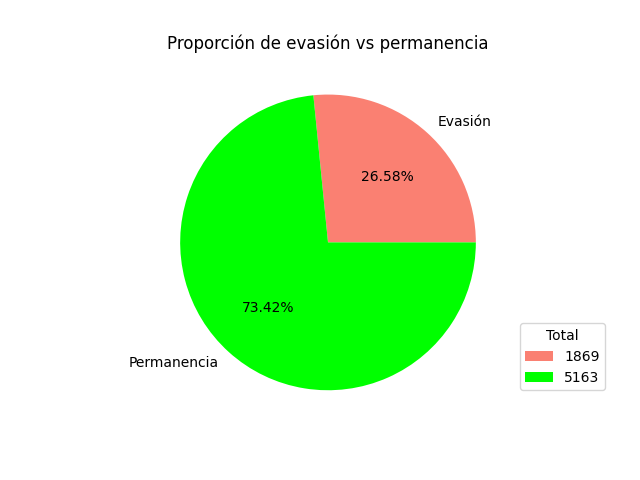

Con una distribución simétrica entre clientas y clientes.

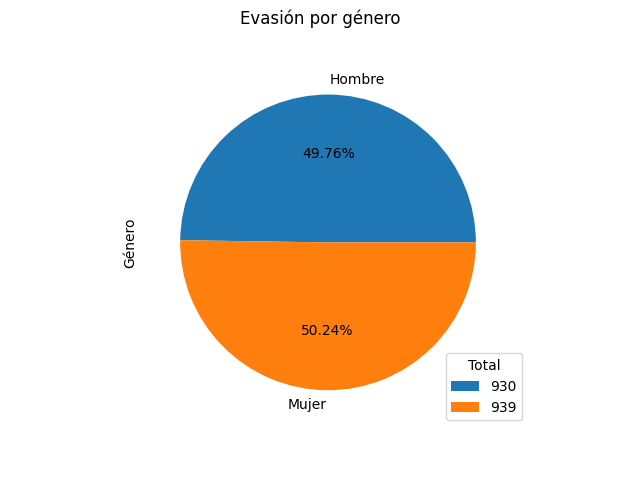

Mismo caso en permanencia.

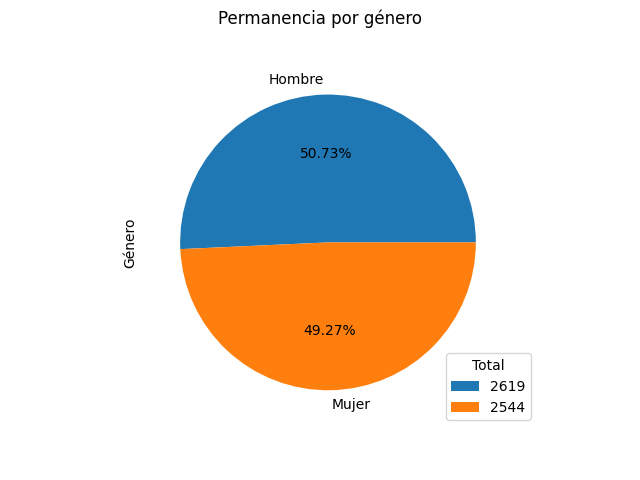

El 94% de la clientela evasora era usuaria de internet, del cual un 70% contaba con conexión de fibra óptica.

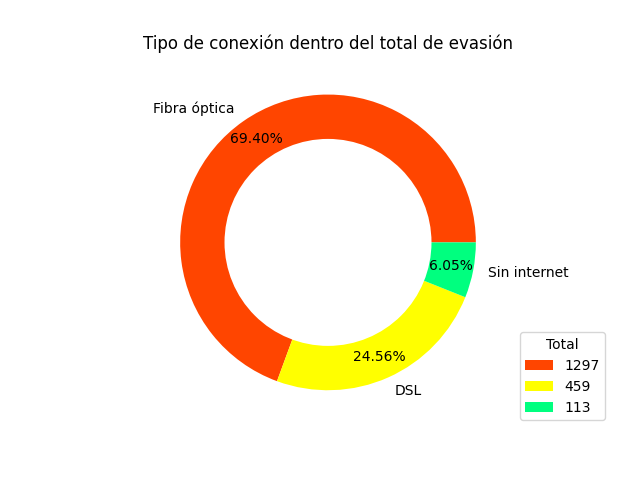

Mientras que en permanencia 72% de la clientela consume servicio de internet, con una distribución más equitativa del tipo de conexion, levemente inclinada hacia conexión DSL.

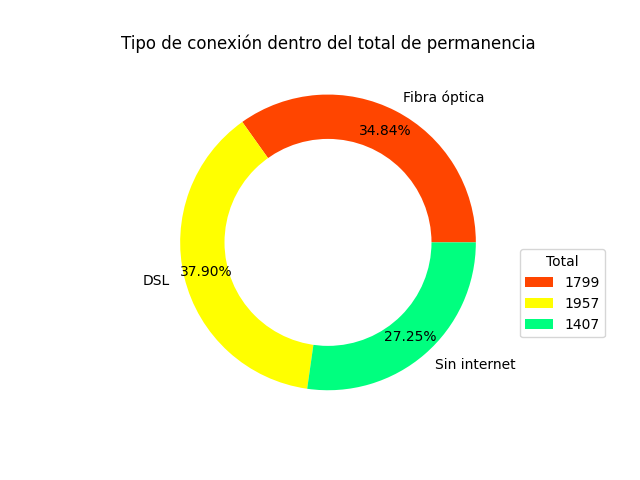

Con un comportamiento igual entre clientas y clientes, dicho comportamiento que, cabe mencionar, se observa en general en todos los rubros del análisis.

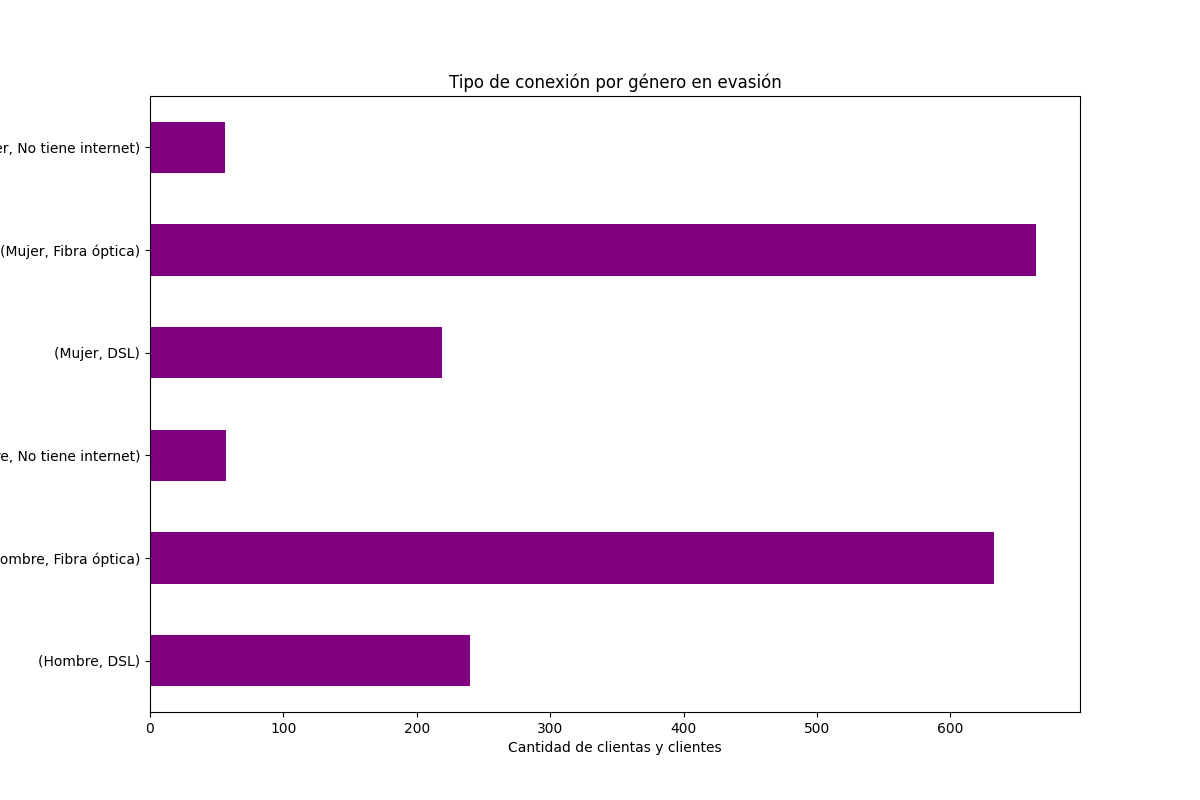

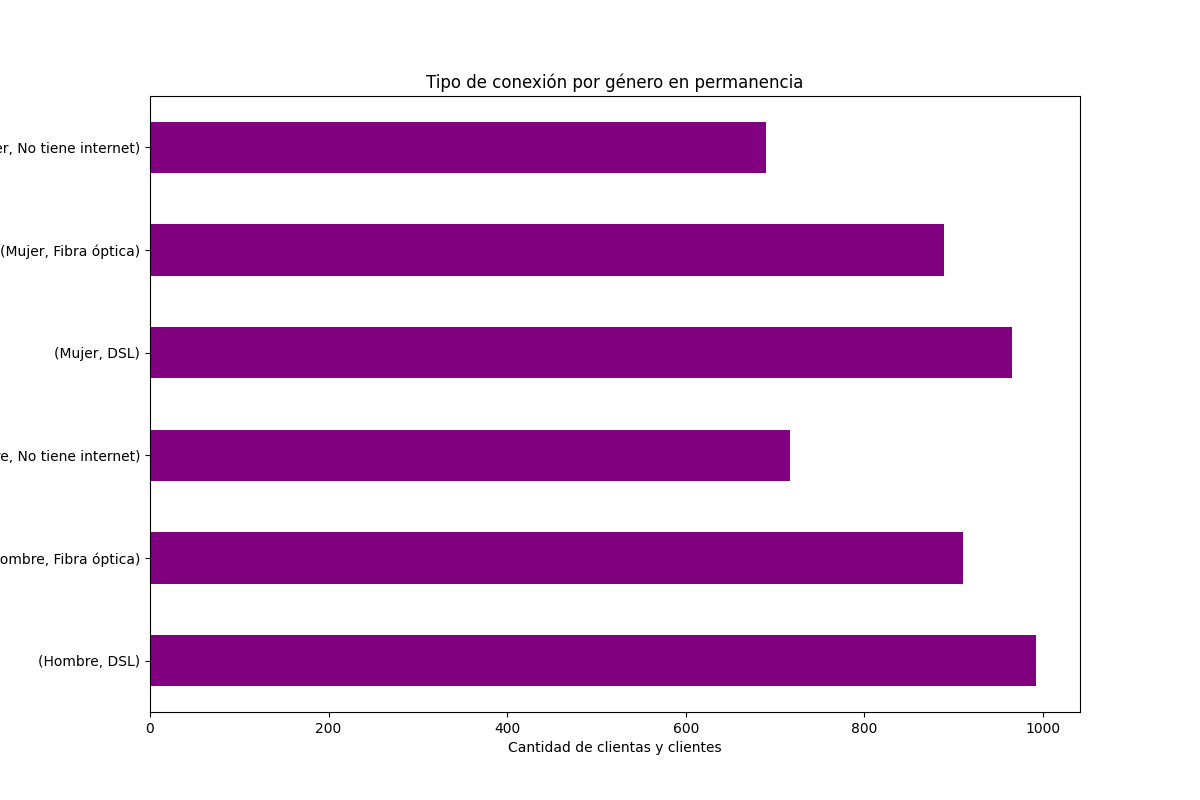

Se observa una marcada tendencia a la evasión en contratación mensual, baja en anual y mínima en bianual.

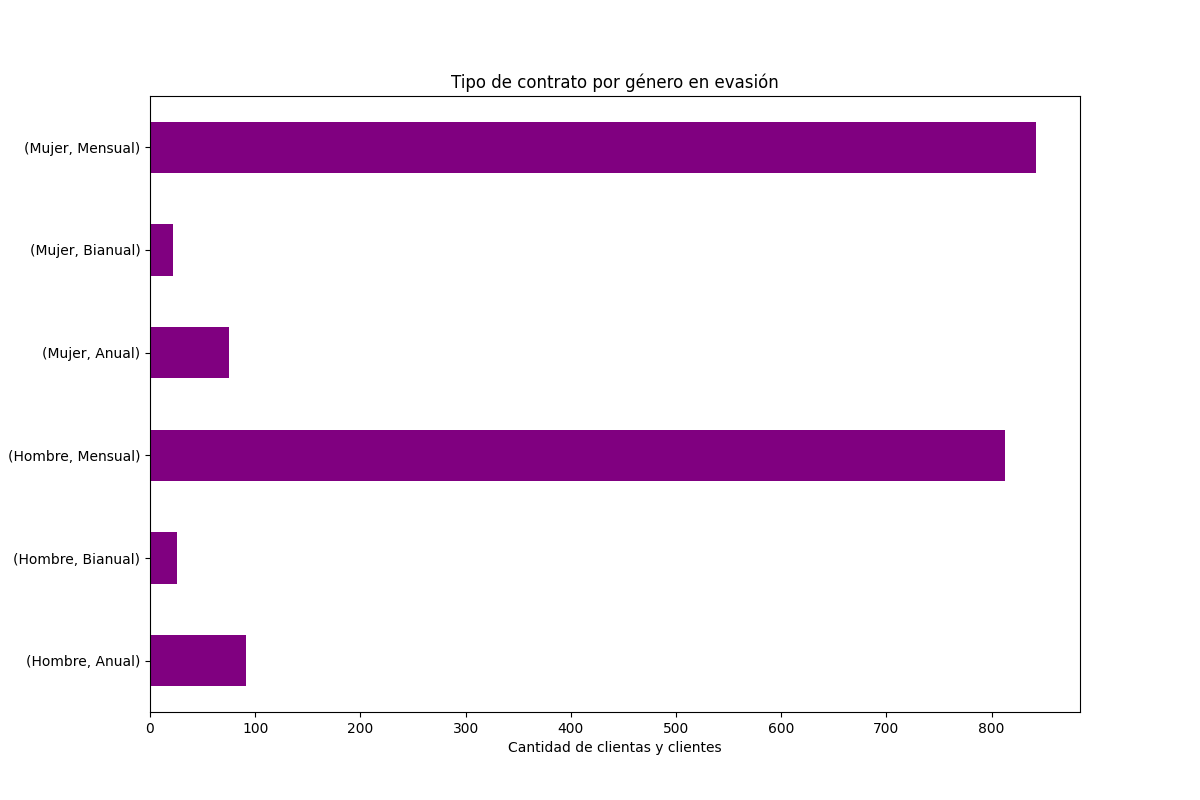

Una duración menor de contrato en evasión mientras que en permanencia hay una mayor duración de contrato.

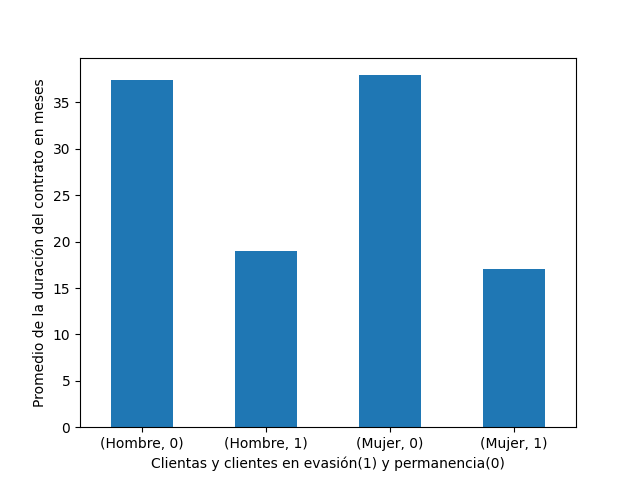

Asimismo, una tendencia elevada a la evasión en forma de pago con cheque electrónico.

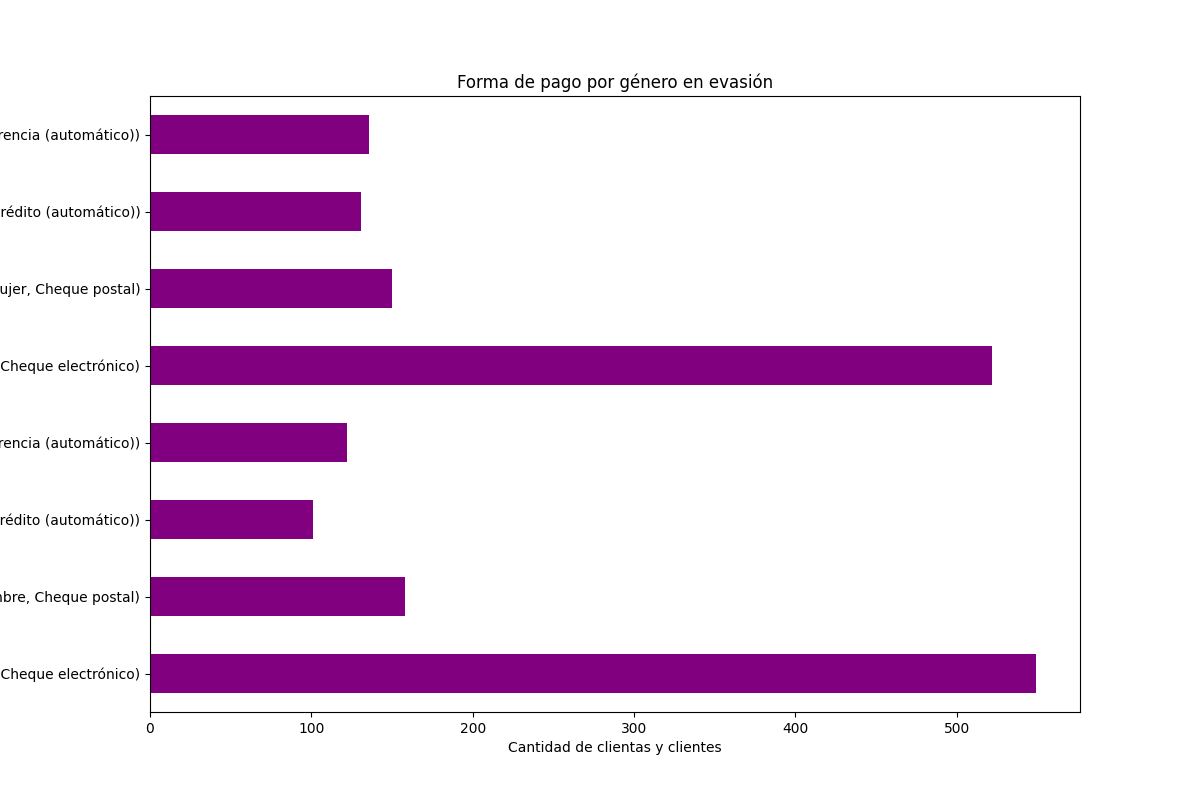

Se observa un promedio menor de pago diario y mensual de la clientela en permanencia, y mayor a largo plazo aunque esto se explica por la duración mayor de contratación y promedio mayor de servicios contratados (4.2 en permanencia vs. 4.1 en evasión); mientras que en evasión se oserva el comportamiento opuesto.

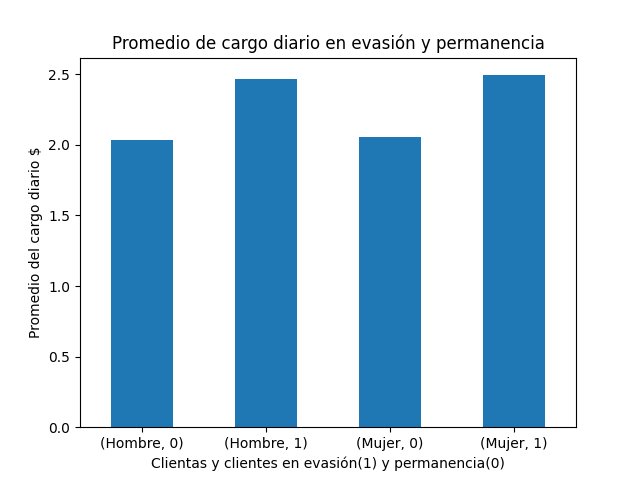

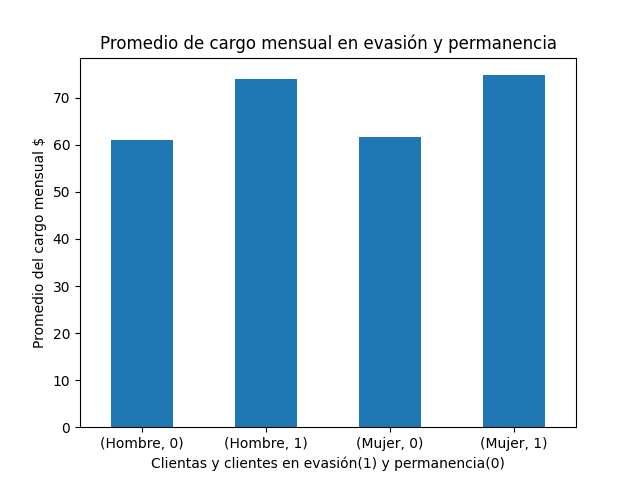

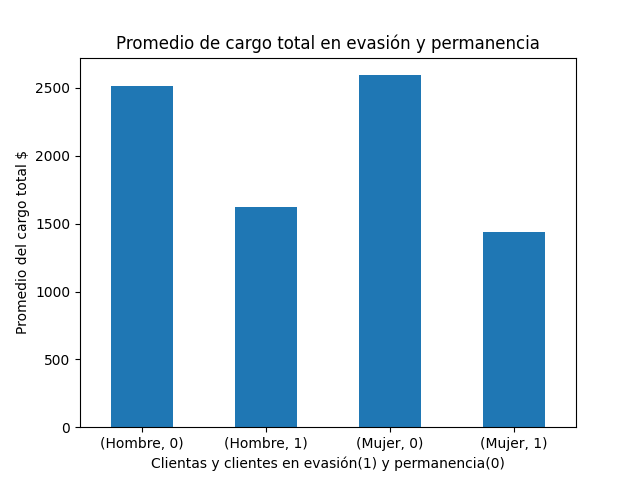

En cuanto a la correlación, se observa una estrecha relación entre los servicios totales y telefonía e internet.

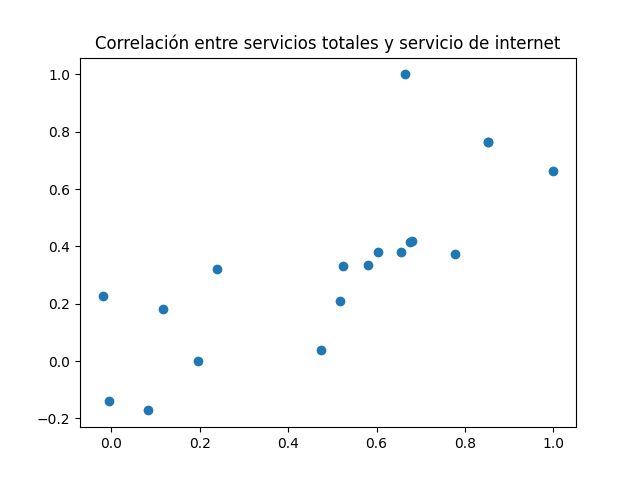

Los principales servicios en evasión: internet 94%, telefonía 90%

Los principales servicios en permanencia: telefonía 90%, internet 72%

##**Conclusiones**

- Problemas de conectividad con la fibra óptica
- Poca motivación a mantener el contrato en tipo de contrato mensual
- Poca motivación a mantener el contrato en costos diarios y mensuales elevados
- Poca motivación a mantener el contrato en forma de pago con cheque electrónico

##**Recomendaciones**

- Resolver los problemas y mejorar la conectividad del servicio de fibra óptica o en su caso promover el servicio de conexión DSL
- Promover principalmente el contrato bianual y en segundo lugar el contrato anual; plantear el contrato mensual como última opción
- Desglosar costos de largo plazo de manera que se puedan plantear como costos reducidos a plazo diario y mensual, por ejemplo, ofreciendo más servicios para que disminuya el promedio del costo, y así sea más atractivo un contrato a largo plazo y un número mayor de servicios.
- Promover como última opción de forma de pago el cheque electrónico